In [1]:
!pip install -U veux opensees
#steel01, steel02, concretee02, concrete04

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [2]:
import veux
import numpy as np
import matplotlib.pyplot as plt
import opensees.openseespy as ops
from opensees.units.english import ksi, psi, inch, kip

In [3]:
def create_frame_2_steel01():
  model = ops.Model('Basic', '-ndm', 2, ndf=3)

  #Define nodes
  model.node(1, 0.0*inch, 0.0*inch)
  model.node(2, 120.0*inch, 0.0*inch)
  model.node(3, 240.0*inch, 0.0*inch)
  model.node(4, 360.0*inch, 0.0*inch)
  model.node(5, 480*inch, 0.0*inch)
  model.node(6, 600*inch, 0.0*inch)
  model.node(7, 0.0*inch, 120.0*inch)
  model.node(8, 120.0*inch, 120.0*inch)
  model.node(9, 240.0*inch, 120.0*inch)
  model.node(10, 360.0*inch, 120.0*inch)
  model.node(11, 480.0*inch, 120.0*inch)
  model.node(12, 600.0*inch, 120*inch)

  #Define Boundary Conditions, fix all bottom nodes

  model.fix(1, (1,1,1)) #fixed in all directions
  model.fix(2, (1,1,1)) #fixed in all directions
  model.fix(3, (1,1,1)) #fixed in all directions
  model.fix(4, (1,1,1)) #fixed in all directions
  model.fix(5, (1,1,1)) #fixed in all directions
  model.fix(6, (1,1,1)) #fixed in all directions

  #Define Geometric Transformation (Linear Transformation)
  model.geomTransf('PDelta', 1)

  #Define Steel 01 material #with the same strain hardening ratio as steel02 material
  Fy = 50*ksi
  E0 = 29000*ksi
  b = 0.02

  model.uniaxialMaterial('Steel01', 1, Fy, E0, b)

  #Define cross-section for nonlinear columns and beam
  side = 4*inch
  area = side**2

  #Define section and assign Steel01 material to fibers in the square section
  model.section('Fiber', 1)
  model.fiber(-side/2, -side/2, 0.01, 1, section=1) #Bottom-left corner fiber (material tag 1)
  model.fiber(side/2, -side/2,0.01, 1, section=1) #Bottom-right corner fiber (material tag 1)
  model.fiber(-side/2, side/2, 0.01, 1, section=1) #Top left corner fiber (material tag 1)
  model.fiber(side/2, side/2, 0.01, 1, section=1) #Top right corner fiber (material tag 1)

  #Define Beam Integration
  model.beamIntegration('Lobatto', 1, 1, 4) #Integration tag 1, section 1, 4 integration points

  #Define Column Elements (forceBeamColumn) with section tag 1 and transformation tag 1
  #element('forceBeamColumn', eleTag, *eleNodes, transfTag, integrationTag, '-iter', maxIter=10, tol=1e-12, '-mass', mass=0.0)
  model.element('forceBeamColumn', 1, (1,7), 1, 1, 'iter', 30, 1e-12) #column
  model.element('forceBeamColumn', 2, (2,8), 1, 1, 'iter', 30, 1e-12) #column
  model.element('forceBeamColumn', 3, (3,9), 1, 1, 'iter', 30, 1e-12) #column
  model.element('forceBeamColumn', 4, (4,10), 1, 1, 'iter', 30, 1e-12) #column
  model.element('forceBeamColumn', 5, (5,11), 1, 1, 'iter', 30, 1e-12) #column`
  model.element('forceBeamColumn', 6, (6,12), 1, 1, 'iter', 30, 1e-12) #column

  #Define Beam Elements (forceBeamColumn) with section tag 1 and transformation tag 1
  model.element('forceBeamColumn', 7, (7,8), 1, 1, 'iter', 30, 1e-12) #beam
  model.element('forceBeamColumn', 8, (8,9), 1, 1, 'iter', 30, 1e-12) #beam
  model.element('forceBeamColumn', 9, (9,10), 1, 1, 'iter', 30, 1e-12) #beam
  model.element('forceBeamColumn', 10, (10,11), 1, 1, 'iter', 30, 1e-12) #beam
  model.element('forceBeamColumn', 11, (11,12), 1, 1, 'iter', 30, 1e-12) #beam

  #Define Truss elements
  side_truss = 2*inch
  A_truss = side_truss**2
  model.element('truss', 12, (1,8), A_truss, 1)
  model.element('truss', 13, (2,7), A_truss, 1)
  model.element('truss', 14, (2,9), A_truss, 1)
  model.element('truss', 15, (3,8), A_truss, 1)
  model.element('truss', 16, (3,10), A_truss, 1)
  model.element('truss', 17, (4,9), A_truss, 1)
  model.element('truss', 18, (4,11), A_truss, 1)
  model.element('truss', 19, (5,10), A_truss, 1)
  model.element('truss', 20, (5,12), A_truss, 1)
  model.element('truss', 21, (6,11), A_truss, 1)



  return model


In [ ]:
def create_frame_2_steel02():
  model02 = ops.Model('Basic', '-ndm', 2, ndf=3)

  #Define nodes
  model02.node(1, 0.0*inch, 0.0*inch)
  model02.node(2, 120.0*inch, 0.0*inch)
  model02.node(3, 240.0*inch, 0.0*inch)
  model02.node(4, 360.0*inch, 0.0*inch)
  model02.node(5, 480*inch, 0.0*inch)
  model02.node(6, 600*inch, 0.0*inch)
  model02.node(7, 0.0*inch, 120.0*inch)
  model02.node(8, 120.0*inch, 120.0*inch)
  model02.node(9, 240.0*inch, 120.0*inch)
  model02.node(10, 360.0*inch, 120.0*inch)
  model02.node(11, 480.0*inch, 120.0*inch)
  model02.node(12, 600.0*inch, 120*inch)

  #Define Boundary Conditions, fix all bottom nodes

  model02.fix(1, (1,1,1)) #fixed in all directions
  model02.fix(2, (1,1,1)) #fixed in all directions
  model02.fix(3, (1,1,1)) #fixed in all directions
  model02.fix(4, (1,1,1)) #fixed in all directions
  model02.fix(5, (1,1,1)) #fixed in all directions
  model02.fix(6, (1,1,1)) #fixed in all directions

  #Define Geometric Transformation (Linear Transformation)
  model02.geomTransf('PDelta', 2)

  #Define Steel 02 material with the same strain hardening ratio as the previous steel 01 material
  E_Steel02 = 29000*ksi
  Fy_Steel02 = 50*ksi
  b_Steel02 = 0.02

  #Added Parameters for Steel 02
  R0 = 20
  R1 = 0.925
  R2 = 0.15
  #These three values come from the https://opensees.berkeley.edu/OpenSees/manuals/usermanual/181.htm
  #website which has recommended values for Steel02

  #material tag = 2, update code accordingly

  model02.uniaxialMaterial('Steel02', 2, Fy_Steel02, E_Steel02, b_Steel02, R0, R1, R2)

  ###continue using the same fiber section definitions and element definitions

  #Define cross-section for nonlinear columns and beam
  side02 = 4*inch
  area02 = side02**2

  #Define section and assign Steel01 material to fibers in the square section
  model02.section('Fiber', 2)
  model02.fiber(-side02/2, -side02/2, 0.01, 2, section=2) #Bottom-left corner fiber (material tag 2)
  model02.fiber(side02/2, -side02/2,0.01, 2, section=2) #Bottom-right corner fiber (material tag 2)
  model02.fiber(-side02/2, side02/2, 0.01, 2, section=2) #Top left corner fiber (material tag 2)
  model02.fiber(side02/2, side02/2, 0.01, 2, section=2) #Top right corner fiber (material tag 2)

  #Define Beam Integration
  model02.beamIntegration('Lobatto', 2, 2, 4) #Integration tag 2, section 2, 4 integration points

  #Define Column Elements (forceBeamColumn) with section tag 1 and transformation tag 1
  #element('forceBeamColumn', eleTag, *eleNodes, transfTag, integrationTag, '-iter', maxIter=10, tol=1e-12, '-mass', mass=0.0)
  model02.element('forceBeamColumn', 1, (1,7), 2, 2, 'iter', 30, 1e-12) #column
  model02.element('forceBeamColumn', 2, (2,8), 2, 2, 'iter', 30, 1e-12) #column
  model02.element('forceBeamColumn', 3, (3,9), 2, 2, 'iter', 30, 1e-12) #column
  model02.element('forceBeamColumn', 4, (4,10), 2, 2, 'iter', 30, 1e-12) #column
  model02.element('forceBeamColumn', 5, (5,11), 2, 2, 'iter', 30, 1e-12) #column`
  model02.element('forceBeamColumn', 6, (6,12), 2, 2, 'iter', 30, 1e-12) #column

  #Define Beam Elements (forceBeamColumn) with section tag 1 and transformation tag 1
  model02.element('forceBeamColumn', 7, (7,8), 2, 2, 'iter', 30, 1e-12) #beam
  model02.element('forceBeamColumn', 8, (8,9), 2, 2, 'iter', 30, 1e-12) #beam
  model02.element('forceBeamColumn', 9, (9,10), 2, 2, 'iter', 30, 1e-12) #beam
  model02.element('forceBeamColumn', 10, (10,11), 2, 2, 'iter', 30, 1e-12) #beam
  model02.element('forceBeamColumn', 11, (11,12), 2, 2, 'iter', 30, 1e-12) #beam

  #Define Truss elements
  side_truss02 = 2*inch
  A_truss02 = side_truss02**2
  model02.element('truss', 12, (1,8), A_truss02, 2)
  model02.element('truss', 13, (2,7), A_truss02, 2)
  model02.element('truss', 14, (2,9), A_truss02, 2)
  model02.element('truss', 15, (3,8), A_truss02, 2)
  model02.element('truss', 16, (3,10), A_truss02, 2)
  model02.element('truss', 17, (4,9), A_truss02, 2)
  model02.element('truss', 18, (4,11), A_truss02, 2)
  model02.element('truss', 19, (5,10), A_truss02, 2)
  model02.element('truss', 20, (5,12), A_truss02, 2)
  model02.element('truss', 21, (6,11), A_truss02, 2)



  return model02

In [22]:
#visualize the model
# veux.render(create_frame_2_steel01())

In [ ]:
model = create_frame_2_steel01()


In [ ]:
#Using the u function from homework1

def u(lambdafactor=2, i=1):
  model = create_frame_2_steel01()
  model.pattern("Plain", 1, "Linear", load={7: (0.5*kip, 0*kip, 0.0)})
  model.algorithm("Newton")
  model.integrator("LoadControl", lambdafactor)
  model.analysis("Static")
  model.analyze(1)
  # Return the displacement of node 4 in the direction `i`
  return model.nodeDisp(7, i)
lambdafactor = 3
displacement = u(lambdafactor)
print(displacement)
print(lambdafactor)


0.07916276049436964
3


In [ ]:
# This function matches the borrowed_pushover_analysis function (when that borrowed_pushover_analysis function
#has H set to 1 kip)
def uprime():
  model = create_frame_2_steel01()
  model.pattern("Plain", 2, "Linear")
  model.load(7, 5*kip, 0, 0)
  model.algorithm("Newton")
  model.integrator("LoadControl",1)
  model.analysis("Static")
  model.analyze(1)
  # Return the displacement of node 4 in the direction `i`
  return model.nodeDisp(7, 1)

displacement = uprime()
print(displacement)


2.7958229679243645


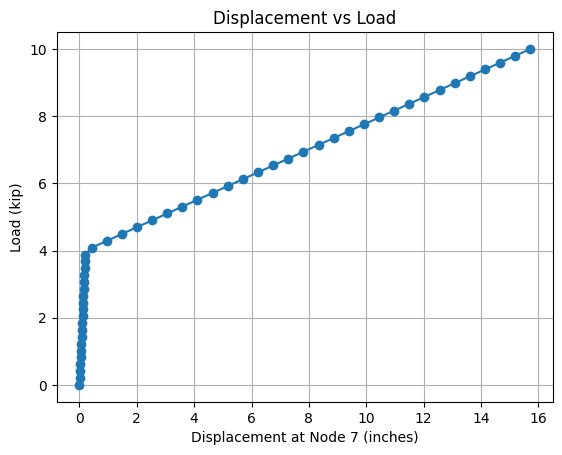

In [4]:
#previous cell but smoother with more increments
#Ask Chatgpt
#please modify the function further to
#obtain fifty load increments evently spaced from 0 to 4 kips

import matplotlib.pyplot as plt
import numpy as np



# Modified uprime function that takes a load as an argument
def uprime(load):
    model = create_frame_2_steel01()
    model.pattern("Plain", 2, "Linear")
    model.load(7, load, 0, 0)
    model.algorithm("Newton")
    model.integrator("LoadControl", 1)
    model.analysis("Static")
    model.analyze(1)
    return model.nodeDisp(7, 1)

# Generate 50 loads from 0 to 4 kips
loads_kip = np.linspace(0, 10, 50)
loads = [l * kip for l in loads_kip]  # Convert to internal units

displacements = []

# Loop through each load and get the displacement
for load in loads:
    u = uprime(load)
    displacements.append(u)

# Plot Displacement (horizontal) vs Load (vertical)
plt.plot(displacements, loads_kip, marker='o')
plt.xlabel('Displacement at Node 7 (inches)')
plt.ylabel('Load (kip)')
plt.title('Displacement vs Load')
plt.grid(True)
plt.show()

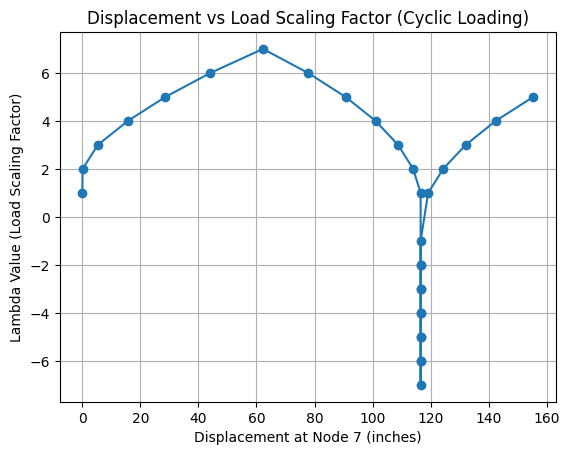

In [27]:
#now a new goal is to investigate cyclic loading of the steel01 and steel02 structures

#borrow the cyclic loading function from the first homework assignment
model = create_frame_2_steel01()

def analyze_history(history, dof=1):
  u_history = []

  model.pattern("Plain", 3, "Linear") #pattern three
  model.load(7, 1*kip, 0, 0) #add a horizontal unit load in x-direction
  for lambda_value in history:
    model.integrator("LoadControl", lambda_value)
    model.algorithm("Newton")
    model.analysis("Static")
    model.analyze(1)
    u_history.append(model.nodeDisp(7,1))
  return u_history


history = [1,2,3,4,5,6,7,6,5,4,3,2,1,-2,-3,-4,-5,-6,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5]
displacements = analyze_history(history)



#plotting the results (displacement vs lambda value)

plt.plot(displacements, history, marker='o')
plt.xlabel('Displacement at Node 7 (inches)')
plt.ylabel('Lambda Value (Load Scaling Factor)')
plt.title('Displacement vs Load Scaling Factor (Cyclic Loading)')
plt.grid(True)
plt.show()

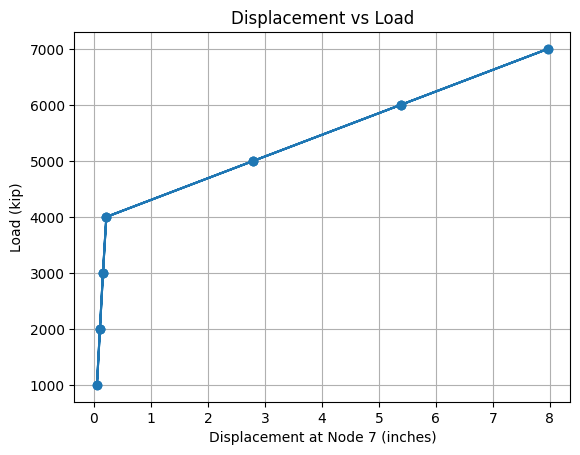

In [ ]:
def uprime_cyclic(load_cyclic):
  model = create_frame_2_steel01()
  model.pattern("Plain", 2, "Linear")
  model.load(7, load_cyclic, 0, 0)
  model.algorithm("Newton")
  model.integrator("LoadControl",1)
  model.analysis("Static")
  model.analyze(1)
  return model.nodeDisp(7,1)
#Generate 50 loads from
load_cyclic= [1,2,3,4,5,6,7,6,5,4,3,2,1,2,3,4,5,6,7]
load_cyclic_kip = [l * kip for l in load_cyclic]

displacements_cyclic = []

for load_cyclic in load_cyclic_kip:
  u_cyclic = uprime_cyclic(load_cyclic)
  displacements_cyclic.append(u_cyclic)



# Plot the results
plt.plot(displacements_cyclic, load_cyclic_kip, marker='o')
plt.xlabel('Displacement at Node 7 (inches)')
plt.ylabel('Load (kip)')
plt.title('Displacement vs Load')
plt.grid(True)
plt.show()



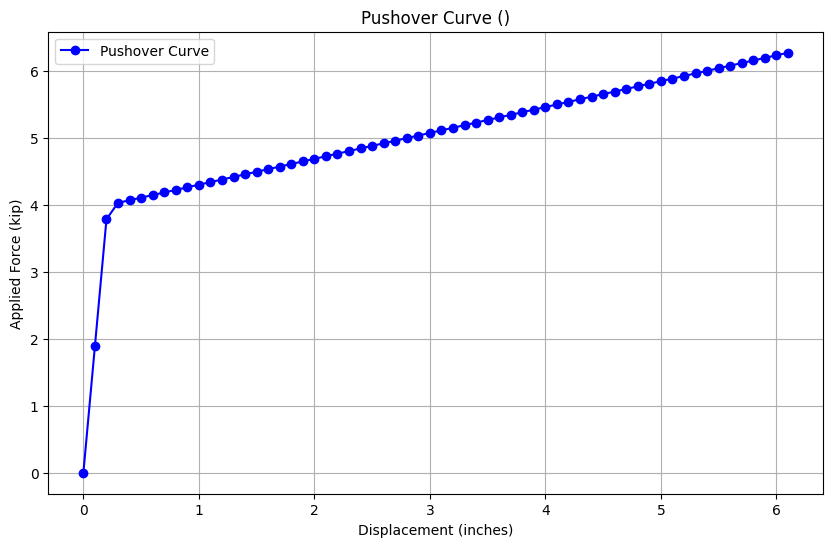

Min u1: 0.0
Max u1: 6.099999999999994


In [ ]:
#borrow the pushover analysis code from the inelastic plane frame example on stairlab
# https://gallery.stairlab.io/examples/example3/
#Note the code for this function is completely copied from the stairlab example of
#inelastic plane frame, but the value of H was changed from 10 to 1. This value of H
#equal to one matches the output of the above displacement function titled uprime
model = create_frame_2_steel01()
def borrowed_pushover_analysis(model, H):

  #Nonlinear pushover analysis

  #Set parameter of reference load
  H = 1*kip
  model.pattern("Plain", 2, "Linear")
  model.load(7, H, 0.0, 0.0, pattern=2)

  #start modifications to the analysis for push over

  #Displacement increment
  dU = 0.1*inch

  #Set the integration scheme to be displacement control
  #######################################node #dof #init #Jd #min #max

  model.integrator("DisplacementControl", 7, 1, dU, 1, dU, dU)

  #Perform the analysis
  #Set parameter
  maxU = 6.0*inch
  numSteps = int(maxU/dU)

  #first try to perform all steps at once
  #status = model.analyze(numSteps)

  u = []
  p = []

  #If the previous attempt was not successful, try
  #more complitated strategies

  u.append(model.nodeDisp(7,1))
  p.append(model.getTime())

  status = ops.successful
  #Analyze in single steps until either (1) we reach maxU or (2) the analysis fail

  #Re-initialize analysis type before entering the loop
  model.analysis("Static")

  while status == ops.successful and u[-1] <maxU:

    status = model.analyze(1)
    #if the analysis failed, try initial tangent iteration

    if status != ops.successful:
      print("...Newton failed, trying initial stiffness")
      #ops.test(NormDispIncr", tol, maxIter, pFlag, nType)
      model.test("NormDispIncr", 1.0e-12, 1000, 5)
      model.algorithm("ModifiedNewton", initial=True)
      status = model.analyze(1)
      if status == ops.successful:
        print("...that worked, back to regular Newton")

      model.test("NormDispIncr", 1.0e-12, 10)
      model.algorithm("Newton")

    u.append(model.nodeDisp(7,1))
    p.append(model.getTime())

  if status != ops.successful:
    raise Exception("Pushover analysis failed")

  return u,p

model = create_frame_2_steel01()
H = 1
u1,p1 = borrowed_pushover_analysis(model, H)


plt.figure(figsize=(10, 6))
plt.plot(u1, p1, label='Pushover Curve', color='b', marker='o', linestyle='-')

plt.title('Pushover Curve ()')
plt.xlabel('Displacement (inches)')
plt.ylabel('Applied Force (kip)')
plt.grid(True)
plt.legend()

#plt.xlim(0,0.5)

plt.show()


print("Min u1:", min(u1))
print("Max u1:", max(u1))


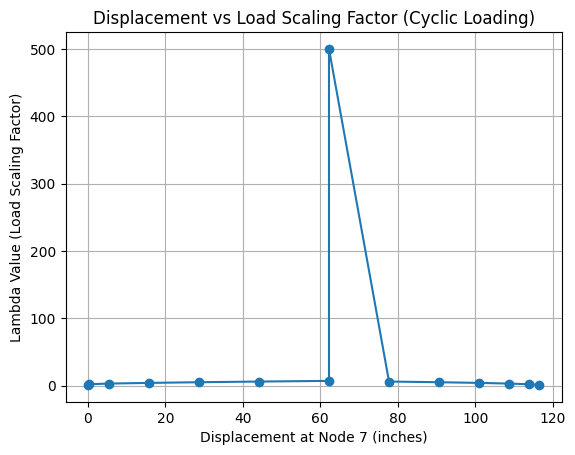

In [20]:
model = create_frame_2_steel01()

def analyze_history(history, dof=1):
  u_history = []

  model.pattern("Plain", 3, "Linear") #pattern three
  model.load(7, 1*kip, 0, 0) #add a horizontal unit load in x-direction
  for lambda_value in history:
    model.integrator("LoadControl", lambda_value)
    model.algorithm("Newton")
    model.analysis("Static")
    model.analyze(1)
    u_history.append(model.nodeDisp(7,1))
  return u_history


history = [1,2,3,4,5,6,7,500,6,5,4,3,2,1]
displacements = analyze_history(history)



#plotting the results (displacement vs lambda value)

plt.plot(displacements, history, marker='o')
plt.xlabel('Displacement at Node 7 (inches)')
plt.ylabel('Lambda Value (Load Scaling Factor)')
plt.title('Displacement vs Load Scaling Factor (Cyclic Loading)')
plt.grid(True)
plt.show()

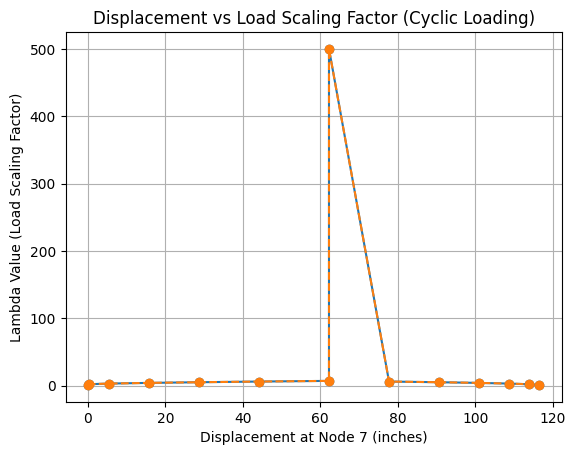

In [21]:
model = create_frame_2_steel02()
history02=[1,2,3,4,5,6,7,500,6,5,4,3,2,1]
displacements02 = analyze_history(history02)

plt.plot(displacements02, history02, marker='o')
plt.xlabel('Displacement at Node 7 (inches)')
plt.ylabel('Lambda Value (Load Scaling Factor)')
plt.title('Displacement vs Load Scaling Factor (Cyclic Loading)')
plt.grid(True)
plt.plot(displacements, history, marker = 'o', linestyle= '--')
